In [ ]:
import pandas as pd
import numpy as np 
import random
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from mlxtend.plotting import plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn import tree
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import GridSearchCV,learning_curve
from sklearn import datasets
from tensorflow import keras
from numpy import mean, cov
from numpy.linalg import eig
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator

In [ ]:
heartData = pd.read_csv('kaggle_heart.csv')

age = heartData['age']
anaemia = heartData['anaemia']
cpk = heartData['creatinine_phosphokinase']
diabetes = heartData['diabetes']
ef = heartData['ejection_fraction']
hbp = heartData['high_blood_pressure']
platelets = heartData['platelets']
cr = heartData['serum_creatinine']
sod = heartData['serum_sodium']
gender = heartData['sex']
smoke = heartData['smoking']
time = heartData['time']
death = heartData['death_event']
col_names = ['age', 'anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']

In [ ]:
#randomly split 80/20 the dataset into training & test components 
x = heartData.copy() #create x,y variables to copy  
y = x['death_event']
x = x.drop(['death_event'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state=0, 
                                                    test_size=0.2, 
                                                    shuffle=True)
scaler_ss=preprocessing.StandardScaler()
X_train_norm=scaler_ss.fit_transform(x_train)
X_test_norm=scaler_ss.transform(x_test)

# Dataset Overview

The dataset has 1 target and 12 input features ranging from clinical, body, and lifestyle information. 
*   Age - Age of the patient
*   Anaemia - Decrease of red blood cells or hemoglobin
*   High Blood Pressure - If a patient has hypertension
*   Creatinine phosphokinase (CPK) - Level of the CPK enzyme in the blood
*   Diabetes - If the patient has diabetes
*   Ejection fraction - Percentage of blood leaving the heart at each contraction
*   Sex - Woman or man
*   Platelets - Platelets in the blood 
*   Serum creatinine - Level of creatinine in the blood 
*   Serum sodium - Level of sodium in the blood
*   Smoking - If the patient smokes
*   Time - Follow-up period after heart failure event
*   (target) death event - If the patient died during the follow-up period

In [ ]:
heartData.describe()  


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
heartData.shape

(299, 13)

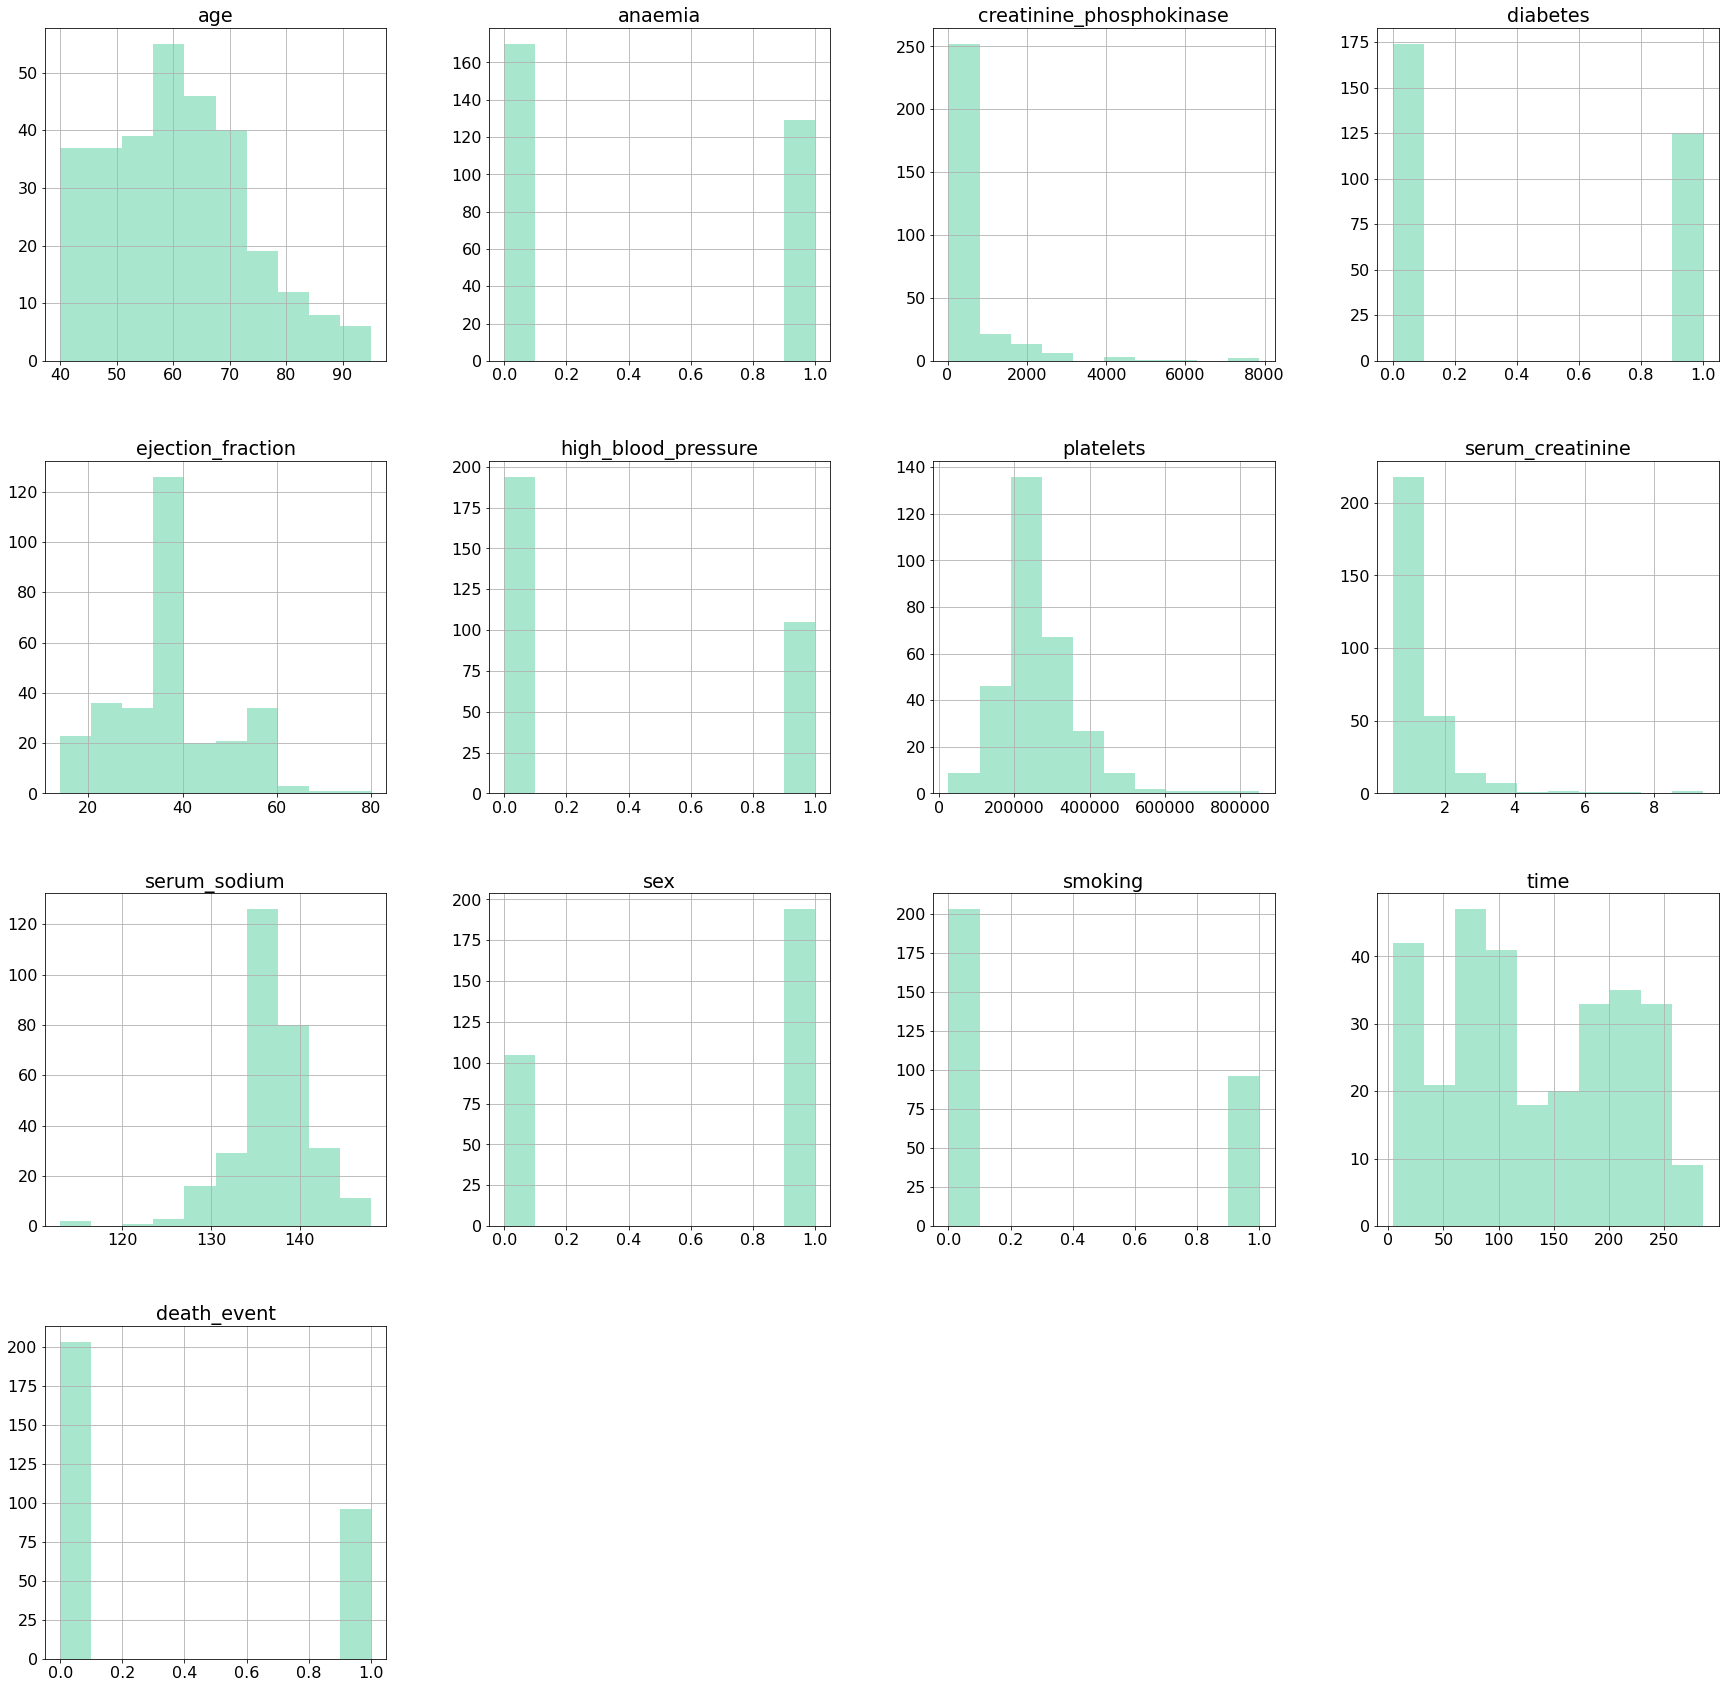

In [ ]:
#create plots
heartData.hist(bins=10,figsize=(30,30),color = "#A8E6CE")
plt.show()

## **How many patients survived after suffering from heart failure?**

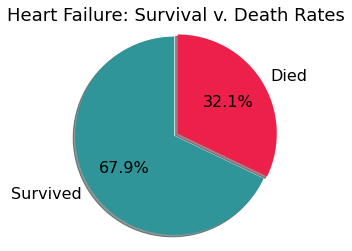

In [ ]:
labels = 'Survived', 'Died'
sizes = [len(heartData[heartData['death_event']==0]),len(heartData[heartData['death_event']==1])]
explode = (0, 0.04) 

fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, colors=('#2F9599','#EC2049'), startangle=90,textprops={'fontsize': 16})
ax1.set_title("Heart Failure: Survival v. Death Rates",fontdict={'fontsize': 18})
ax1.axis('equal') 

plt.show()

**Results** A little more than 2/3 of the patients survived after experiencing heart failure.

## Does Gender Influence Survival Rates?

In [ ]:
#create variables to combine gender with the target outcome
d1 = heartData[(heartData["death_event"]==0) & (heartData["sex"]==1)] #male survival data
d2 = heartData[(heartData["death_event"]==1) & (heartData["sex"]==1)] #male death data
d3 = heartData[(heartData["death_event"]==0) & (heartData["sex"]==0)] #female surival data
d4 = heartData[(heartData["death_event"]==1) & (heartData["sex"]==0)] #female death data

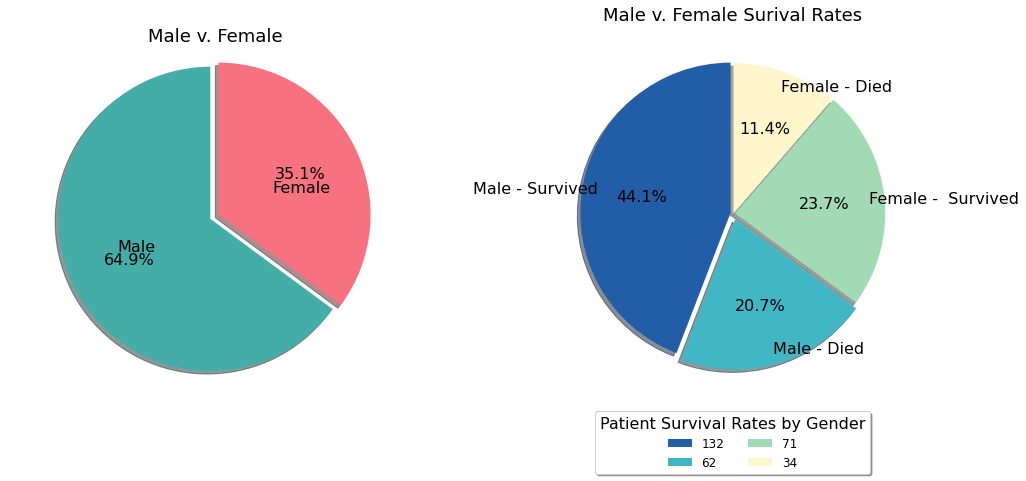

In [ ]:
labels = 'Male', 'Female'
size1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
explode = (0.02, 0.04) 

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))

ax1.pie(size1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, colors=('#45ADA8', '#F67280'), labeldistance=0.4,
        startangle=90,textprops={'fontsize': 16})
ax1.set_title("Male v. Female",fontdict={'fontsize': 18})
ax1.axis('equal') 

labels2 = 'Male - Survived','Male - Died', "Female -  Survived", "Female - Died"
size2 = [len(d1),len(d2),len(d3),len(d4)]
explode2 = (0.02, 0.04,0.01,0) 
ax2.pie(size2, explode=explode2, labels=labels2, autopct='%1.1f%%',
           shadow=True, colors=('#225ea8', '#41b6c4', '#a1dab4', '#fff7cc'),
           labeldistance=0.9, startangle=90,textprops={'fontsize': 16})
ax2.set_title("Male v. Female Surival Rates\n",fontdict={'fontsize': 18})
ax2.axis('equal') 
ax2.legend([len(d1),len(d2),len(d3),len(d4)],
           title = "Patient Survival Rates by Gender",
           loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2,
           fontsize=12, title_fontsize=16)

plt.tight_layout()
plt.show()

## What is the overall age of the patients?

Minimum patient age:  40
Maximum patient age:  95


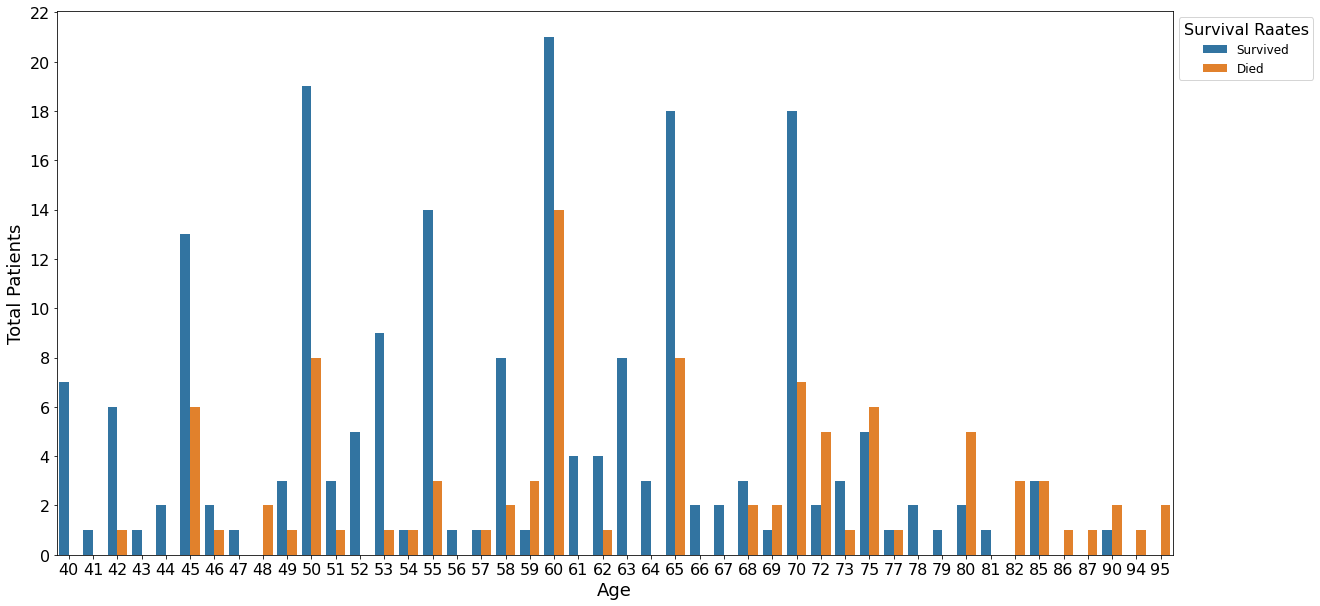

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=16)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20,22,24],fontsize=16)

dia=sns.countplot(x=heartData['age'],hue=death)
plt.ylabel('Total Patients',fontdict={'fontsize': 18})
plt.xlabel('Age',fontdict={'fontsize': 18})
legend_labels, _= dia.get_legend_handles_labels()
dia.legend(legend_labels, ['Survived','Died'], 
          bbox_to_anchor=(1,1), 
          title='Survival Raates',fontsize=12, title_fontsize=16)
print("Minimum patient age: ", min(age))
print("Maximum patient age: ", max(age))

## Analyze Categorical Features of the Dataset

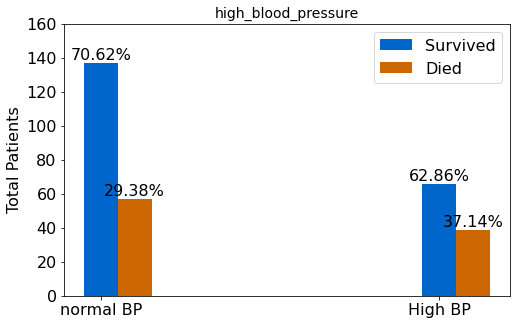

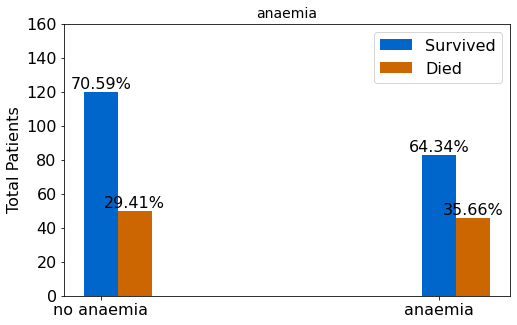

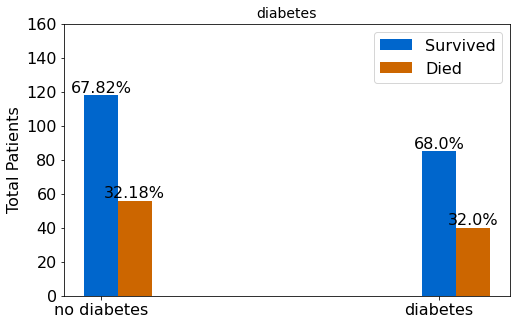

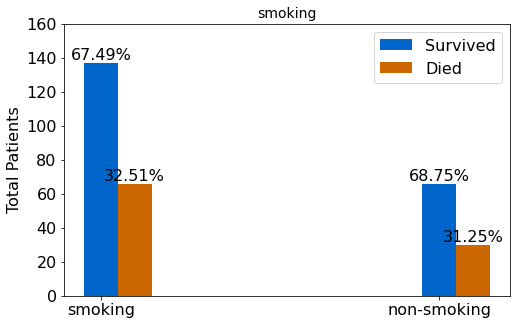

In [ ]:
cat= ['high_blood_pressure','anaemia','diabetes','smoking']
types=[['normal BP','High BP'],['no anaemia','anaemia'],['no diabetes','diabetes'], ['smoking', 'non-smoking']]

for i,c in enumerate(cat):
    alive = heartData[heartData['death_event']==0]
    died= heartData[heartData['death_event']==1]
    plt.figure(figsize=(8,5))
    bar1=plt.bar([0,1], alive.groupby(c).count()['age'], width=0.1, color='#0066cc', align='center', label="Survived")
    bar2= plt.bar([0+0.1,1+0.1], died.groupby(c).count()['age'], width=0.1, color='#cc6600', align='center', label="Died")
    plt.title(c,{'fontsize': 14})
    plt.ylabel('Total Patients') 
    plt.ylim(0,160)
    plt.xticks([0,1], types[i])
    
    plt.yticks(fontsize=16)
    plt.legend()
    
    hights_odd=[]
    hights_even=[]
    
    for i,rect in enumerate (bar1 + bar2):
        height = rect.get_height()
        if (i+1)%2==0:
            hights_even.append(height)
        if (i+1)%2!=0:
            hights_odd.append(height)

    for i,rect in enumerate (bar1 + bar2):
        height = rect.get_height()
        if (i+1)%2==0:
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%s' % str(round((height/sum(hights_even)*100),2))+"%", ha='center', va='bottom')
        if (i+1)%2!=0:
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%s' % str(round((height/sum(hights_odd))*100,2))+"%", ha='center', va='bottom')

In [ ]:
fig = px.parallel_categories(heartData[["smoking","diabetes","anaemia","high_blood_pressure","time","death_event"]], 
                             color='death_event', color_continuous_scale=px.colors.sequential.Darkmint)
fig.show()

##Analyze Numeric Features of the Dataset

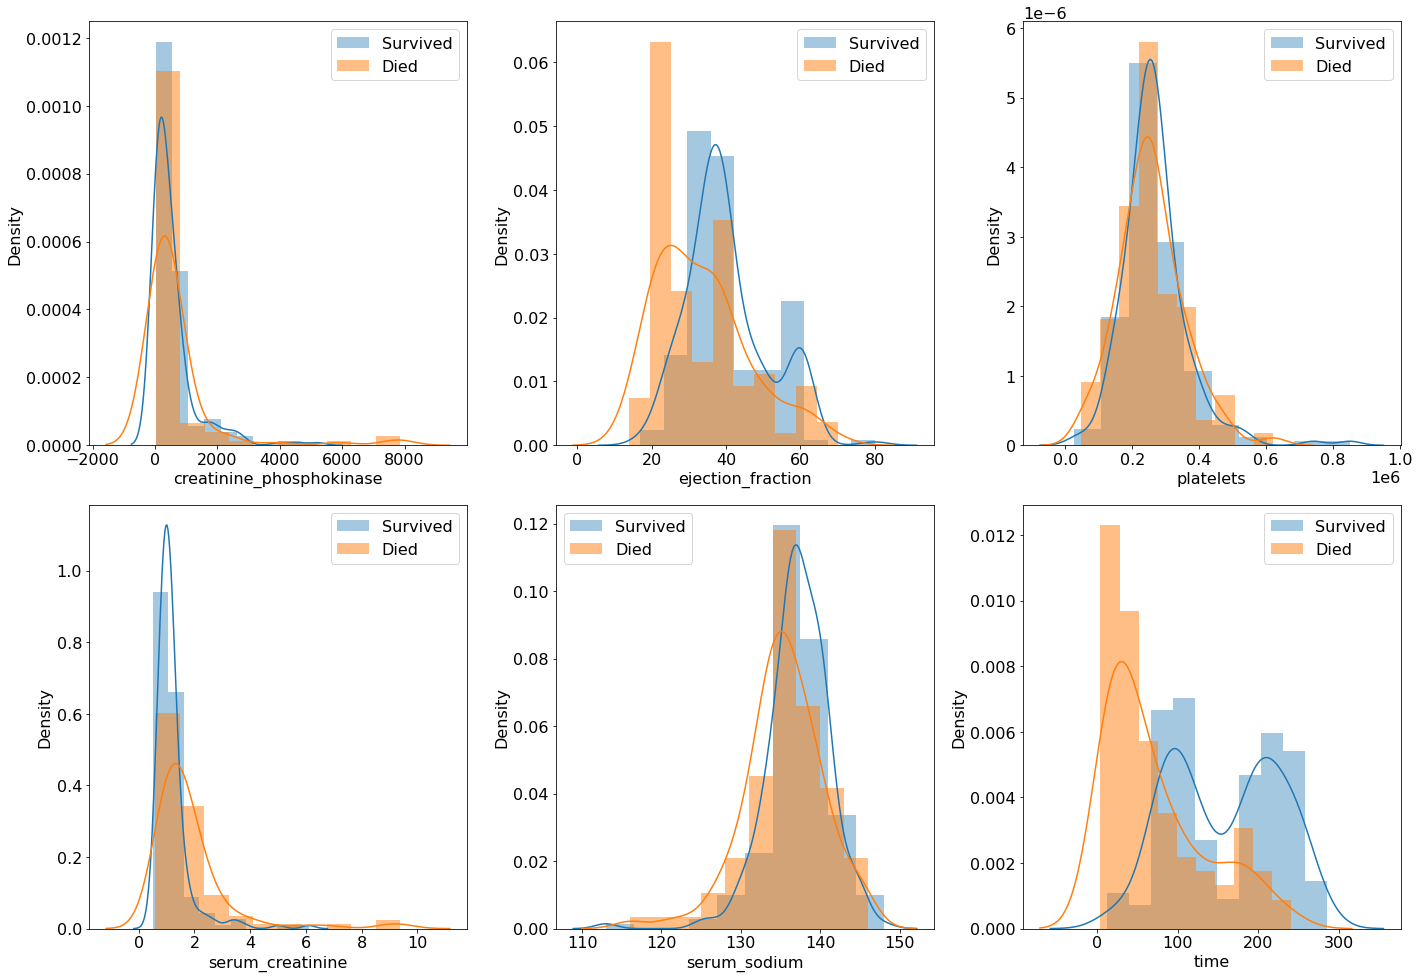

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams.update({'font.size': 16})

df_copy = heartData.copy()
#change column types so only numerical columns print out

for col in ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']:
    df_copy[col] = df_copy[col].astype('category')

df_grouped = df_copy.groupby(by='death_event')
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
titles = list(df_copy.select_dtypes(include='category'))

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.distplot(df_grouped.get_group(0)[title], bins=10, ax=ax, label='Survived')
    sns.distplot(df_grouped.get_group(1)[title], bins=10, ax=ax, label='Died',hist_kws=dict(alpha=0.5))
    ax.legend()

axs.flat[-1].remove()
axs.flat[-3].remove()
axs.flat[-2].remove()
fig.tight_layout()

#Methods 

##Locating Correlations in the Dataset


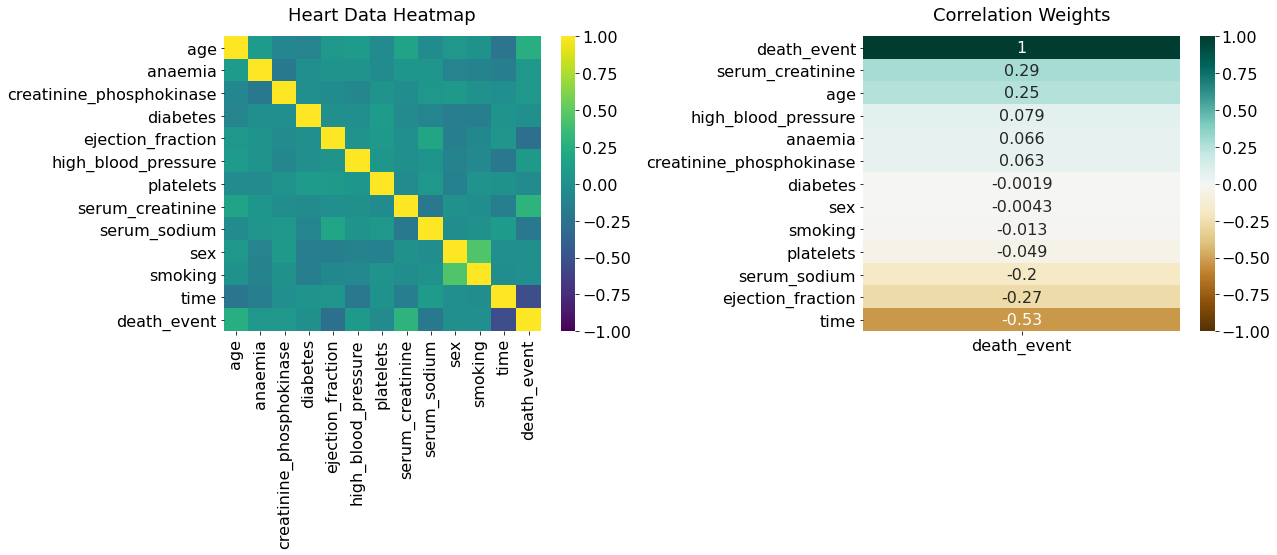

In [ ]:
corr = heartData.corr() #find the pairwise correlation of all columns

fig, (axh1,axh2) = plt.subplots(1,2,figsize=(18,8))
heatmap1 = sns.heatmap(corr, vmin=-1, cmap='viridis', annot=False,ax=axh1)
heatmap1.set_title('Heart Data Heatmap', fontdict={'fontsize':18}, pad=16)

heatmap = sns.heatmap(heartData.corr()[['death_event']].sort_values(by='death_event', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG',ax=axh2)
heatmap.set_title('Correlation Weights', fontdict={'fontsize':18}, pad=16)

plt.tight_layout()
plt.show()

The heatmaps highlight the features: age, ejection fraction, serum creatinine, serum sodium, and time as having a strong relationship with the death event outcome. As the second heatmap shwows, ejection fraction, serum sodium, and time have a negative correlation to the death event indicating an inverse relationship with the target label. Meanwhile, age and serum creatinine have a positive correlation to the death event.

## Decision Tree Classifier


In [ ]:
dt_scores = []
for i in range(1, len(x.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train_norm, y_train)
    dt_scores.append(dt_classifier.score(X_test_norm, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

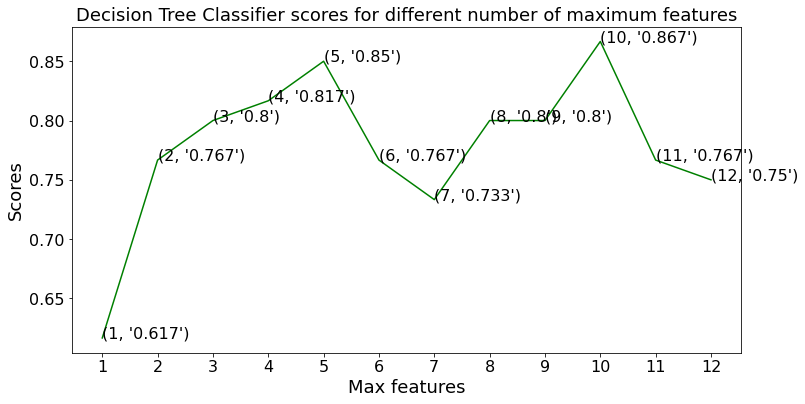

In [ ]:
plt.figure(figsize=(12,6))
plt.plot([i for i in range(1, len(x.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(x.columns) + 1):
    plt.text(i, dt_scores[i-1], (i,"{0:.3}".format(dt_scores[i-1])),fontsize = 16)
plt.xticks([i for i in range(1, len(x.columns) + 1)],fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Max features',fontdict={'fontsize': 18})
plt.ylabel('Scores',fontdict={'fontsize': 18})
plt.title('Decision Tree Classifier scores for different number of maximum features',fontdict={'fontsize': 18})

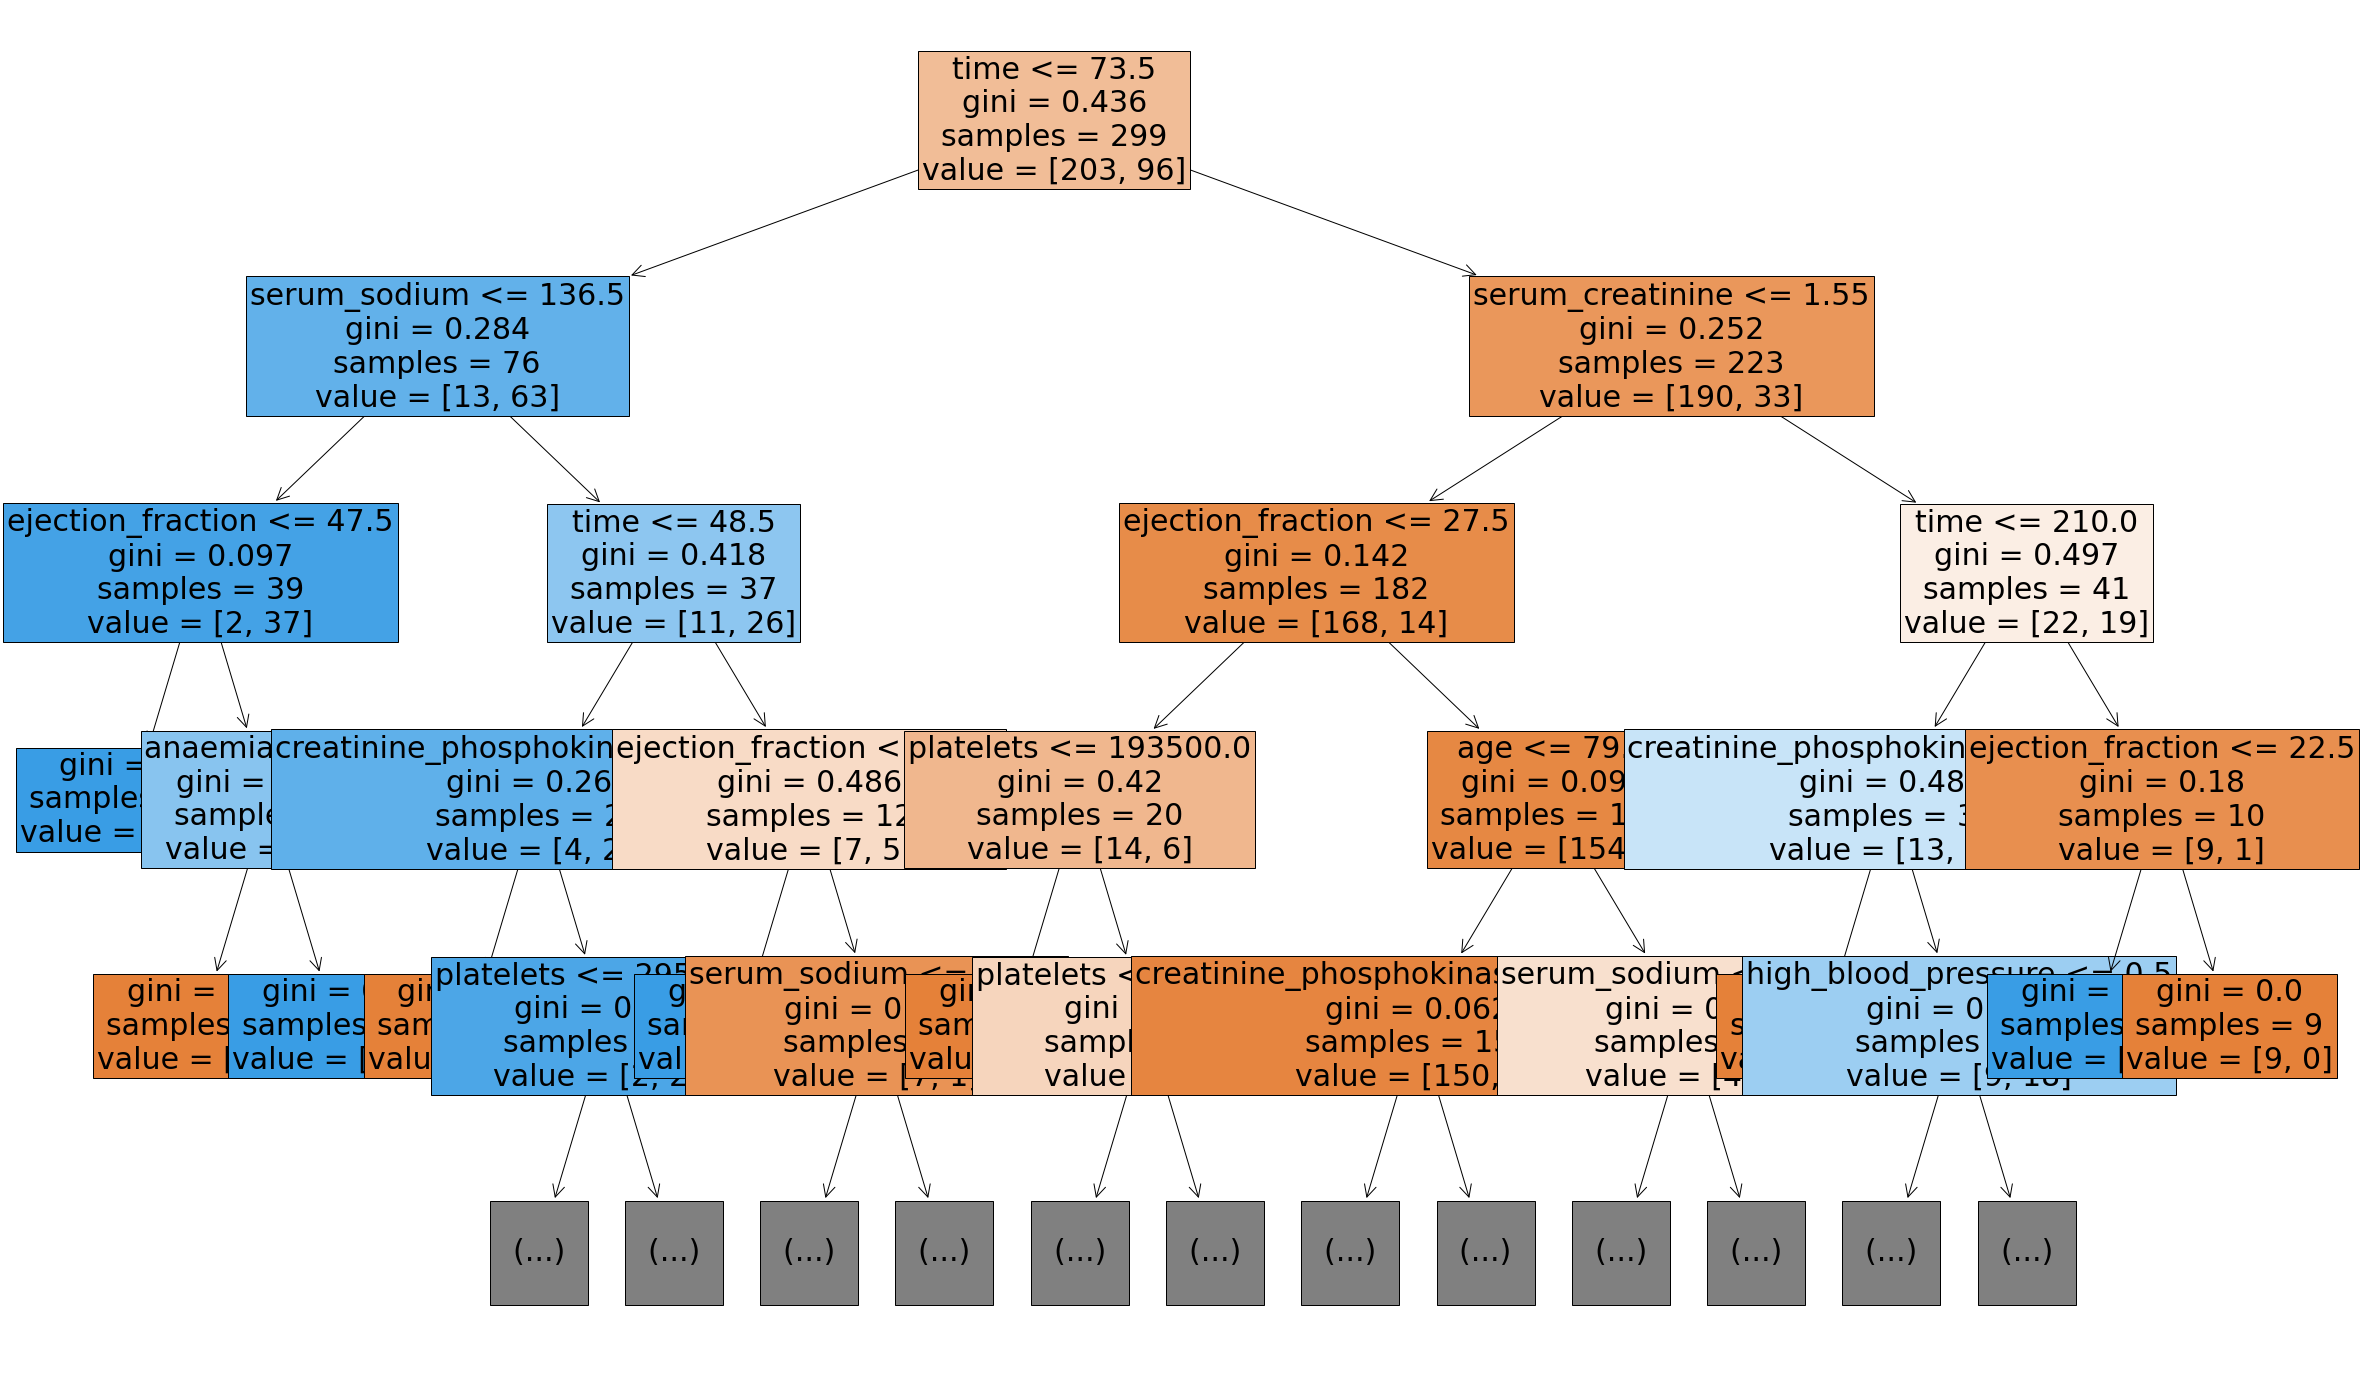

In [ ]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(x, y)
text_representation = tree.export_text(clf)
fig, ax = plt.subplots(figsize=(40, 25))
tree.plot_tree(model, max_depth=4, fontsize=30, rotate=True, feature_names=col_names, filled=True)
plt.show()

Decision Tree Training Data Accuracy = 100.00
Decision Tree Test Data Accuracy  = 73.33
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        37
           1       0.65      0.65      0.65        23

    accuracy                           0.73        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.73      0.73      0.73        60



Text(0.5, 0.98, 'Decision Tree - Confusion Matrix')

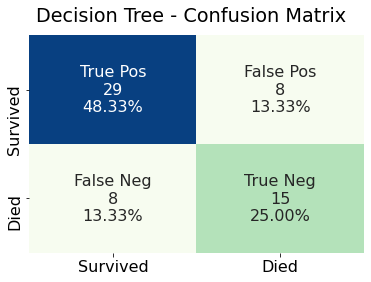

In [ ]:
#Determine Precision, Recall, F1, and accuracy of the decision tree algorithm
dtree2 = tree.DecisionTreeClassifier()
dt_parm = dtree2.fit(X_train_norm, y_train)
dt_scores.append(dtree2.score(X_train_norm, y_train))
y_dtree=dtree2.predict(X_test_norm)

print("Decision Tree Training Data Accuracy = {0:.2f}".format(100*dt_parm.score(X_train_norm, y_train)))
print("Decision Tree Test Data Accuracy  = {0:.2f}".format(100*metrics.accuracy_score(y_test, y_dtree)))
print(classification_report(y_test, y_dtree))

#Plot Decision Tree Confusion Matrix
cmRF2 = confusion_matrix(y_test, y_dtree)
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in
                cmRF2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmRF2.flatten()/np.sum(cmRF2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cmRF2, annot=labels, fmt='', cmap='GnBu',xticklabels=["Survived","Died"],yticklabels=["Survived","Died"], cbar=False,)
plt.suptitle("Decision Tree - Confusion Matrix")

**Result:** The decision tree method chose five features which would have an accuracy of 85% but when run with the data the test accuracy was about 77%. The top five features in the dataset according to the model are:

1.   Time
2.   Serum Creatinine
3.   Serum Sodium
4.   Ejection Fraction
5.   Creatinine Phosphokinase 

The decision tree has a test accuracy of 76.67%. The type I errors are low at 6.67% while type II errors occur at 16.67%. Given this is a healthcare problem having a low type I error is preferable. 



##Random Forest Classifier 


In [ ]:
RFC=RandomForestClassifier(max_features='sqrt', max_depth=1000, random_state=1, n_estimators=1000, min_samples_split=2)
RFC_clf = RFC.fit(X_train_norm, y_train)
y_RFC=RFC.predict(X_test_norm)

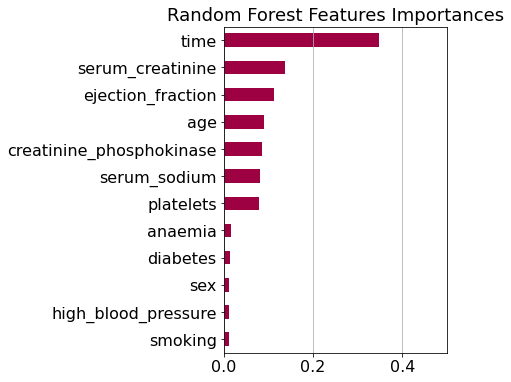

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot Random Forest Features by order of Importance
plt.figure(figsize=(4,6))
feat_importances = pd.Series(RFC_clf.feature_importances_, heartData.drop('death_event', axis=1).columns)
feat_importances.nsmallest(12).plot(kind='barh',cmap=plt.cm.Spectral)

plt.xlim((0,0.5))
plt.grid(axis='x')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Random Forest Features Importances',fontdict={'fontsize': 18})
plt.show()

plt.clf()

In [ ]:
#predict accuracy of data
print('Random Forest Classifier Train Accuracy: ', "{0:.2f}%".format(100*(RFC_clf.score(X_train_norm, y_train))))
print('Random Forest Classifier Test Accuracy: ', "{0:.2f}%".format(100*(metrics.accuracy_score(y_test, y_RFC))))
print(classification_report(y_test,y_RFC))

Random Forest Classifier Train Accuracy:  100.00%
Random Forest Classifier Test Accuracy:  85.00%
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        37
           1       0.94      0.65      0.77        23

    accuracy                           0.85        60
   macro avg       0.88      0.81      0.83        60
weighted avg       0.86      0.85      0.84        60



The random forest classifier has a high test accuracy at 85% which is nearly 10% higher than the decision tree. However, the train accuracy is at 100% meaning the model is likely overfitting the data. The next step will be to use grid search to find the optimal parameters for the dataset.

###Hyperparameter Optimization for Random Forest Classifier

In [ ]:
estimator = RandomForestClassifier()
param_grid = {
    'max_depth':range(2,7),
    'n_estimators':range(10,30)
}

In [ ]:
grid_search_rf = GridSearchCV(estimator,param_grid=param_grid)
grid_search_rf.fit(X_train_norm, y_train)

print('Best Parameters were: {}'.format(grid_search_rf.best_params_))
print('Best CrossVal Score was:', "{0:.2f}%".format(100*(grid_search_rf.best_score_)))

Best Parameters were: {'max_depth': 6, 'n_estimators': 11}
Best CrossVal Score was: 87.43%


In [ ]:
rf_clf = RandomForestClassifier(
    max_depth = 5,
    n_estimators = 19
)
rf_clf.fit(
    X_train_norm,
    y_train.values.ravel()
)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        37
           1       0.93      0.61      0.74        23

    accuracy                           0.83        60
   macro avg       0.87      0.79      0.81        60
weighted avg       0.85      0.83      0.82        60

Random Forest Classifier Hypertuned Train Accuracy:  94.98%
Random Forest Classifier Hypertuned Test Accuracy:  83.33%


Text(0.5, 0.98, 'Random Forest Classifier')

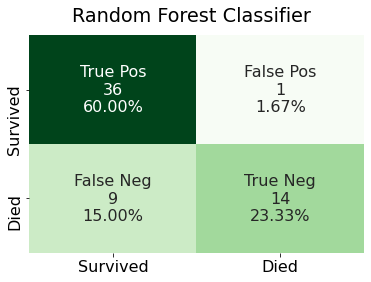

In [ ]:
y_pred_rf = rf_clf.predict(X_test_norm)

print(classification_report(y_test,y_pred_rf))
print('Random Forest Classifier Hypertuned Train Accuracy: ', "{0:.2f}%".format(100*(grid_search_rf.score(X_train_norm, y_train))))
print('Random Forest Classifier Hypertuned Test Accuracy: ', "{0:.2f}%".format(100*(metrics.accuracy_score(y_test, y_pred_rf))))

#Print Confustion Matrix
cmRF = confusion_matrix(y_test, y_pred_rf)
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in
                cmRF.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmRF.flatten()/np.sum(cmRF)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cmRF, annot=labels, fmt='', cmap='Greens',xticklabels=["Survived","Died"],yticklabels=["Survived","Died"], cbar=False,)
plt.suptitle("Random Forest Classifier")

By applying the trained model to the test portion of the dataset, the classifier produces better results and the model no longer was overfitting. Based on this new information, if a new patient presented symptoms, the model would correctly identify whether or not they were at a high risk of not surviving from heart failure 76.67% of the time.

Also, the F score on the hypertuned model remained the same. However, the training accuracy was reduced to a more realistic accuracy of 94% compared to the 100% in the original Random Forest classifier.

The random forest has an accuracy of 85% with a false negative rate of 13.33% The Random Forest also identified the same feature shaving a high correlation with the target outcome as the heatmaps.

*   36 patients were predicted that they will Survive Heart Failure ,the Prediction was CORRECT (True-Positive)
*   15 patients were predicted that they will NOT Survive Heart Failure,the Prediction was CORRECT (True-Negative)
*   1 patients were predicted that they will Survive Heart Failure but the Prediction was WRONG (False-Positive)
*   8 patients were predicted that they will NOT Survive Heart Failure but the Prediction was WRONG (False-Negative)

The classifier predicts the best performing features will be time, serum creatinine, ejection fraction, and age. The classifier scores high on precision so it accurately predicts about 81% of the time if a new patient will survive from heart failure. 

## Preliminary PCA 

In [ ]:
#Ensure the training data is normalized
sc = StandardScaler()
x = sc.fit_transform(x)
xPCAnorm = sc.fit_transform(x_train)

#Here we can see the mean is effectively zero (normalized)
np.mean(xPCAnorm)

In [ ]:
pca = PCA(12)
pca.fit(xPCAnorm)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Find the proper K

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(heartData)
    Sum_of_squared_distances.append(km.inertia_)

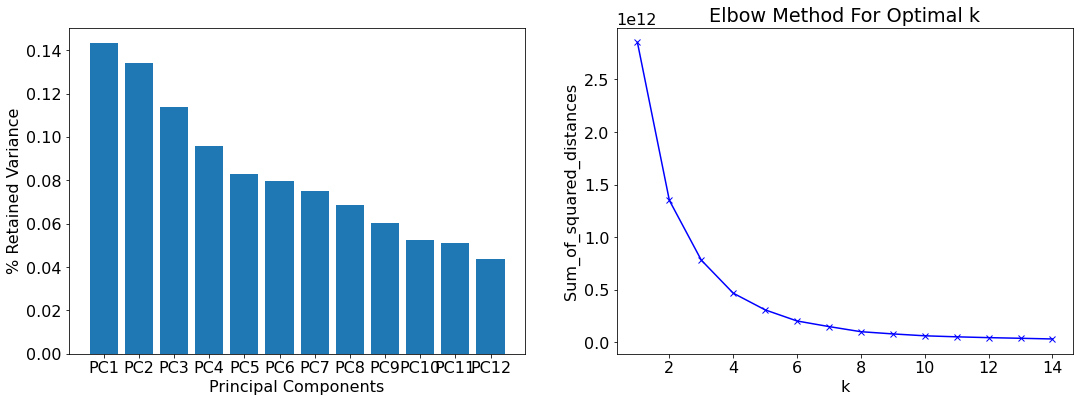

In [ ]:
PC = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']

fig, (axp1,axp2) = plt.subplots(1,2,figsize=(18,6))

axp1.bar(PC, pca.explained_variance_ratio_)
axp1.set_xlabel('Principal Components',axes=axp1)
axp1.set_ylabel('% Retained Variance')

n_comp = np.arange(12)
n_comp = n_comp+1
cumulative = np.cumsum(pca.explained_variance_ratio_)
#added elbow chart
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
""" 
removed this graph because it was idential to the left but in linear form instead of bar 
axp2.plot(n_comp,cumulative)
axp2.xaxis.set_major_locator(MaxNLocator(integer=True))
axp2.set_xlabel('Principal Components',axes=axp2)
axp2.set_ylabel('Cumulative % of Retained Variance')

print("Print PCA Variance Ratios:", pca.explained_variance_ratio_)
ax.set_title("Principal Variance Plot")
"""
plt.show()

Find the amount of principal components to create at least 85% retained variance

In [ ]:
sum_variance, component_count = 0, 0
while sum_variance < 0.85:
    sum_variance += pca.explained_variance_ratio_[component_count]
    component_count += 1
    
print('Number of Principal Components that explain >=85% of Variance: ', component_count)
print('Total Variance Explained by '+str(component_count)+' components:', str(sum_variance*100)+'%')

Number of Principal Components that explain >=85% of Variance:  9
Total Variance Explained by 9 components: 85.31177199222905%


### Logistic Regression Before & After PCA

The Logistic regression is a supervised machine learning model that works best when the dependent variable is binary. 

In [ ]:
Log_Reg=LogisticRegression(C=1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Log_Reg.fit(X_train_norm, y_train)
y_reg=Log_Reg.predict(X_test_norm)
print('Logistic Regression Train Accuracy = ', "{0:.2f}%".format(100*Log_Reg.score(X_train_norm, y_train)))
print('Logistic Regression Test Accuracy  = ', "{0:.2f}%".format(100*metrics.accuracy_score(y_test, y_reg)))

Logistic Regression Train Accuracy =  83.26%
Logistic Regression Test Accuracy  =  76.67%


AUC: 0.753


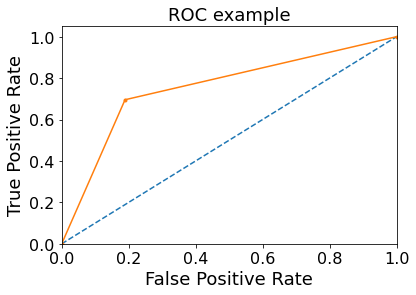

In [ ]:
#Let see the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_reg)
print('AUC: %.3f' % auc_score)

plt.figure(figsize=(6,4))
fpr, tpr, thresholds = roc_curve(y_test, y_reg)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontdict={'fontsize': 18})
plt.ylabel('True Positive Rate',fontdict={'fontsize': 18})
plt.title('ROC example',fontdict={'fontsize': 18})
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
#Create and fit PCA object
pca = PCA(component_count)
pca.fit(X_train_norm)

#Transforming x_train and x_test 
x_train_pca = pca.transform(X_train_norm)
x_test_pca = pca.transform(X_test_norm)

#Training
Log_Reg.fit(x_train_pca, y_train)

#Predict
y_pred_train = Log_Reg.predict(x_train_pca)
y_pred_test = Log_Reg.predict(x_test_pca)

print("Accuracy of Logistic Regression with PCA Training Set = ","{0:.2f}%".format(100*accuracy_score(y_train, y_pred_train)))
print("Accuracy of Logistic Regression with PCA Test Set     = ","{0:.2f}%".format(100*accuracy_score(y_test, y_pred_test)))

#print the ROC score
auc_score = roc_auc_score(y_test, y_pred_test)
print('AUC: %.3f' % auc_score)

Accuracy of Logistic Regression with PCA Training Set =  82.43%
Accuracy of Logistic Regression with PCA Test Set     =  78.33%
AUC: 0.759


Logistic Regression Before PCA 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        37
           1       0.70      0.70      0.70        23

    accuracy                           0.77        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.77      0.77      0.77        60

Logistic Regression After PCA 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        37
           1       0.75      0.65      0.70        23

    accuracy                           0.78        60
   macro avg       0.78      0.76      0.76        60
weighted avg       0.78      0.78      0.78        60



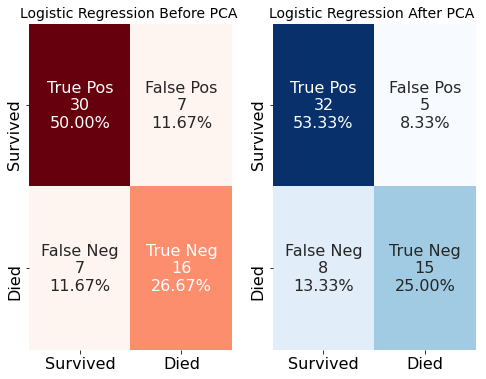

In [ ]:
fig, (axlr1,axlr2) = plt.subplots(1,2,figsize=(8,6))

#print confusion matrix before PCA applied
cmLogr = confusion_matrix(y_test, y_reg)
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in
                cmLogr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmLogr.flatten()/np.sum(cmLogr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmLogr, annot=labels, fmt='', cmap='Reds',
            xticklabels=["Survived","Died"],yticklabels=["Survived","Died"],
            cbar=False,ax=axlr1)
axlr1.set_title("Logistic Regression Before PCA ",fontdict={'fontsize': 14})
print("Logistic Regression Before PCA \n",classification_report(y_test,y_reg))

#print confusion matrix after pca applied
cmLogRpca = confusion_matrix(y_test, y_pred_test)
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in
                cmLogRpca.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmLogRpca.flatten()/np.sum(cmLogRpca)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cmLogRpca, annot=labels, fmt='', cmap='Blues',
            xticklabels=["Survived","Died"],yticklabels=["Survived","Died"],
            cbar=False,ax = axlr2)
axlr2.set_title("Logistic Regression After PCA ",fontdict={'fontsize': 14})
print("Logistic Regression After PCA \n", classification_report(y_test,y_pred_test))

##Support Vector Machine


In [ ]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    svc_scores.append(svc_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for Different Kernels')

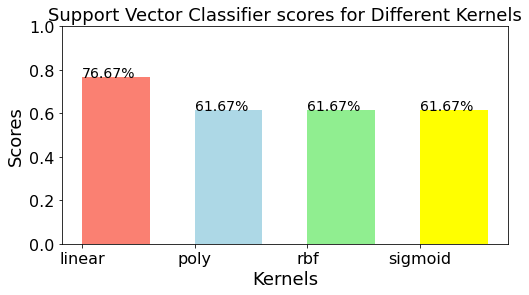

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(kernels, svc_scores, color = ['salmon','lightblue','lightgreen','yellow'],align='edge', width=0.6)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], ("{0:.4}%".format(100*svc_scores[i])),fontsize=14)
plt.xlabel('Kernels',fontdict={'fontsize': 18})
plt.ylabel('Scores',fontdict={'fontsize': 18})
plt.xticks(fontsize=16)
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=16)
plt.title('Support Vector Classifier scores for Different Kernels',fontdict={'fontsize': 18})

The linaer kernal performed the best for this data set with a score of 76.67%. This result presents a problem since a linear model would not perform well given the dependent is binary and not continous in nature. 

In [ ]:
SVC_param={'kernel':['linear','rbf','poly','sigmoid'],
           'C':[0.1,1,10],
           'decision_function_shape':['ovr'],
           'random_state':[0]}
SVC_pol=SVC()
SVC_parm=GridSearchCV(SVC_pol, SVC_param, cv=5)
SVC_parm.fit(X_train_norm, y_train)
y_pol=SVC_parm.predict(X_test_norm)

In [ ]:
modelSVC = svm.SVC(kernel='linear') # Linear Kernel

modelSVC.fit(X_train_norm, y_train)

y_pred_svc = modelSVC.predict(X_test_norm)

#Accuracy Scores for Test & Training Data
print("Linear SVC Train Accuracy =  {:.2f}%".format(modelSVC.score(X_train_norm,y_train)*100))
print("Linear SVC Test Accuracy  = {:.2f}%".format(modelSVC.score(X_test_norm,y_test)*100))
print(classification_report(y_test,y_pred_svc))

Linear SVC Train Accuracy =  85.36%
Linear SVC Test Accuracy  = 80.00%
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        37
           1       1.00      0.48      0.65        23

    accuracy                           0.80        60
   macro avg       0.88      0.74      0.75        60
weighted avg       0.85      0.80      0.78        60



The SVC classifier with the linear kernel has a test accuracy of 80% the next step will be to test the model for any bias or variance. 

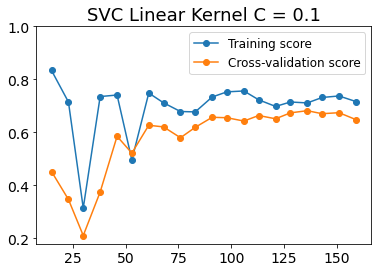

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C=0.1,gamma= 1, kernel='linear'), X_train_norm , y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-validation score")
plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=14)
plt.xticks([25,50,75,100,125,150],fontsize=14)
plt.title('SVC Linear Kernel C = 0.1',fontdict={'fontsize': 18})
plt.legend(loc='best', prop={'size': 12})


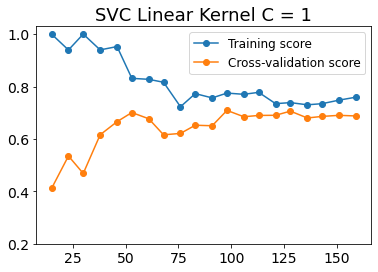

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C=1,gamma = 1,kernel='linear'), X_train_norm, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-validation score")
plt.xticks([25,50,75,100,125,150],fontsize=14)
plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=14)
plt.title('SVC Linear Kernel C = 1',fontdict={'fontsize': 18})
plt.legend(loc='best', prop={'size': 12})

As predicted by the binary nature of the dependent data a linear kernel would be a poor model to use on the data. The above learning curves demonstrate high bias.

### #SVC Grid Search for Best Hyperparameters

Since the linear kernel produced poor results, the model will use Grid-search to find the optime hyperparameters of the models which results in the most 'accurate' predictions for the support vector class.

In [ ]:
param_grid = {'C':[1,2,3,4,5,6,7,8,14], 'gamma':[0.1, 0.01, 0.001, 0.0001], 'kernel':['linear', 'poly', 'rbf'], 'degree': [1,2,3,4,5]}
grid = GridSearchCV(param_grid= param_grid, estimator= SVC(), scoring='f1', refit= True, verbose=1)

In [ ]:
grid.fit(X_train_norm, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2700 out of 2700 | elapsed:   13.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 14],
                         'degree': [1, 2, 3, 4, 5],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [ ]:
grid.best_params_

{'C': 8, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}

In [ ]:
y_pred_svcgs = grid.predict(X_test_norm)

print("Linear SVC Train Accuracy =  {:.2f}%".format(100*grid.score(X_train_norm,y_train)))
print("Linear SVC Test Accuracy  = {:.2f}%".format(100*modelSVC.score(X_test_norm,y_test)))
print(classification_report(y_test, y_pred_svcgs))

Linear SVC Train Accuracy =  73.13%
Linear SVC Test Accuracy  = 80.00%
              precision    recall  f1-score   support

           0       0.75      0.97      0.85        37
           1       0.92      0.48      0.63        23

    accuracy                           0.78        60
   macro avg       0.83      0.73      0.74        60
weighted avg       0.81      0.78      0.76        60



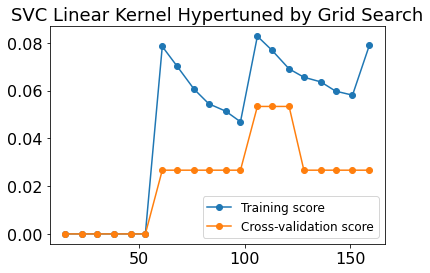

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C=8,gamma = 0.01,kernel='poly'), X_train_norm, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-validation score")
plt.title('SVC Linear Kernel Hypertuned by Grid Search',fontdict={'fontsize': 18})
plt.legend(loc='best', prop={'size': 12})

Text(0.5, 0.98, 'Linear SVC - Confusion Matrix')

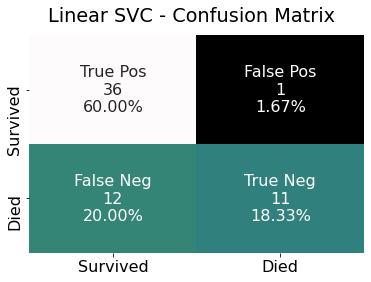

In [ ]:
cmSVC = confusion_matrix(y_test, y_pred_svcgs)
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in
                cmSVC.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmSVC.flatten()/np.sum(cmSVC)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cmSVC, annot=labels, fmt='', cmap='gist_earth',xticklabels=["Survived","Died"],yticklabels=["Survived","Died"], cbar=False,)
plt.suptitle("Linear SVC - Confusion Matrix")

##KNN Classifier 


In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier = classifier.fit(X_train_norm,y_train)

y_pred = classifier.predict(X_test_norm)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(classifier.score)
print('Training Data Accuracy for K Nearest Neighbor: {:.2f}%'.format(100*accuracy))
print(classification_report(y_test,y_pred))

<bound method ClassifierMixin.score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')>
Training Data Accuracy for K Nearest Neighbor: 66.67%
              precision    recall  f1-score   support

           0       0.67      0.89      0.77        37
           1       0.64      0.30      0.41        23

    accuracy                           0.67        60
   macro avg       0.65      0.60      0.59        60
weighted avg       0.66      0.67      0.63        60



**Results**: The KNN model has an accuracy of 66.67%. Further testing methods will be applied below to improve the model's performance.

### k-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=3)
 
cv_scores = cross_val_score(knn_cv, X_train_norm, y_train, cv=5)

print(cv_scores)
print('Cross Validation Scores Accuracy :{:.2f}%'.format(100*np.mean(cv_scores)))

[0.77083333 0.72916667 0.72916667 0.6875     0.74468085]
Cross Validation Scores Accuracy :73.23%


### Hypertuning model parameters using GridSearchCV

In [ ]:
knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X_train_norm, y_train)

y_pred_gscv = classifier.predict(X_test_norm)
print("Optimal number of K neighbors: ", knn_gscv.best_params_)
print("Accuracy of optimal number of K neighbors on training data:  {:.2f}%".format(100*knn_gscv.best_score_))

Optimal number of K neighbors:  {'n_neighbors': 5}
Accuracy of optimal number of K neighbors on training data:  75.34%


Applying grid search improved the accuracy by 2% over cross-validation and by 9.33% when using the default training K nearest neighbor model.

In [ ]:
knn_scores = []
for k in range(1,25):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train_norm, y_train)
    knn_scores.append(knn_classifier.score(X_test_norm, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

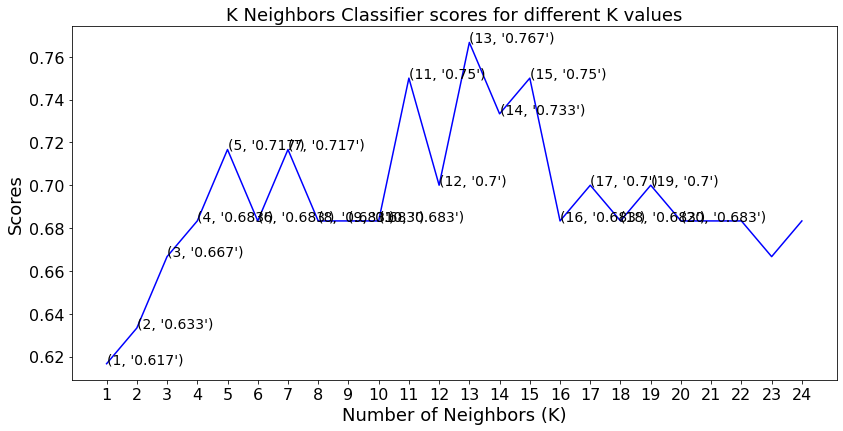

In [ ]:
plt.figure(figsize=(12,6))

plt.plot([k for k in range(1, 25)], knn_scores, color = 'blue')
for i in range(1,21):

    plt.text(i, knn_scores[i-1],(i,"{0:.3}".format(knn_scores[i-1])), fontsize=14)
    
plt.xticks([i for i in range(1, 25)])
plt.xlabel('Number of Neighbors (K)',fontdict={'fontsize': 18})
plt.ylabel('Scores',fontdict={'fontsize': 18})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.title('K Neighbors Classifier scores for different K values',fontdict={'fontsize': 18})

              precision    recall  f1-score   support

           0       0.67      0.89      0.77        37
           1       0.64      0.30      0.41        23

    accuracy                           0.67        60
   macro avg       0.65      0.60      0.59        60
weighted avg       0.66      0.67      0.63        60



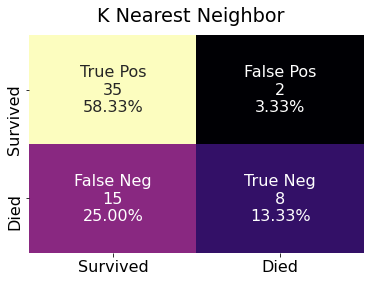

In [ ]:
knn2.fit(X_train_norm, y_train)
y_knn2=knn2.predict(X_test_norm)

#Plot Confusion Matrix
cmK_NN = confusion_matrix(y_test, y_knn2)
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in
                cmK_NN.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmK_NN.flatten()/np.sum(cmK_NN)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmK_NN, annot=labels, fmt='', cmap='magma',xticklabels=["Survived","Died"],yticklabels=["Survived","Died"], cbar=False,)
plt.suptitle("K Nearest Neighbor")
print(classification_report(y_test,y_pred_gscv))

#Results 


## Algorithms Predictions & Rankings

In [ ]:
#Reload Clean Dataset Variables for use in Rankings
x = heartData.copy() #create x,y variables to copy then randomly split 80/20 the dataset into training & test components 
y = x['death_event']
x = x.drop(['death_event'], axis=1)

In [ ]:

Score1=[]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1000)

for a in range(100):
    forest = RandomForestClassifier(random_state=a)
    forest.fit(x_train,y_train)
    pred = forest.predict(x_test)
    b = accuracy_score(y_test,pred)
    Score1.append(b) 

In [ ]:
dtree = DecisionTreeClassifier(random_state=Score1.index(np.array(Score1).max()))
log = LogisticRegression(random_state=Score1.index(np.array(Score1).max()))
knn = KNeighborsClassifier()
forest = RandomForestClassifier(random_state=Score1.index(np.array(Score1).max()))
svmLR = SVC(random_state=Score1.index(np.array(Score1).max()))
svmLR.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=8, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
log.fit(x_train,y_train)
knn.fit(x_train,y_train)
dtree.fit(x_train,y_train)
forest.fit(x_train,y_train)
svmLR.score(x_train,y_train)

0.6607142857142857

In [ ]:
prediction = log.predict(x_test)
print('                    Logistic Regression')
print(classification_report(y_test,prediction))

                    Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        55
           1       0.70      0.70      0.70        20

    accuracy                           0.84        75
   macro avg       0.80      0.80      0.80        75
weighted avg       0.84      0.84      0.84        75



In [ ]:
prediction1 = forest.predict(x_test)
print('                    Random Forest Classifier')
print(classification_report(y_test,prediction1))

                    Random Forest Classifier
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        55
           1       0.73      0.80      0.76        20

    accuracy                           0.87        75
   macro avg       0.83      0.85      0.83        75
weighted avg       0.87      0.87      0.87        75



In [ ]:
prediction2 = knn.predict(x_test)
print('                    K Nearest Neighbor Classifier')
print(classification_report(y_test,prediction2))

                    K Nearest Neighbor Classifier
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        55
           1       0.41      0.35      0.38        20

    accuracy                           0.69        75
   macro avg       0.59      0.58      0.59        75
weighted avg       0.68      0.69      0.68        75



In [ ]:
prediction3 = dtree.predict(x_test)
print('                    Decision Tree Classifier')
print(classification_report(y_test,prediction3))

                    Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        55
           1       0.60      0.75      0.67        20

    accuracy                           0.80        75
   macro avg       0.75      0.78      0.76        75
weighted avg       0.82      0.80      0.81        75



In [ ]:
prediction4 = svmLR.predict(x_test)
print('                    Linear SVC')
print(classification_report(y_test,prediction4))

                    Linear SVC
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        55
           1       0.00      0.00      0.00        20

    accuracy                           0.73        75
   macro avg       0.37      0.50      0.42        75
weighted avg       0.54      0.73      0.62        75



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
models = pd.Series(['Random Forest Classifier','Logistic Regression','Decision Tree Classifier','LinearSVC','K Nearest Neighbor'])
Accuracy = pd.Series([accuracy_score(y_test,prediction1),accuracy_score(y_test,prediction),accuracy_score(y_test,prediction3),accuracy_score(y_test,prediction4),accuracy_score(y_test,prediction2)])
Leaderboard = pd.DataFrame({'Models':models,'Accuracy':Accuracy})
Leaderboard.index=['Gold','Silver','Bronze','Consolation Prize','Honorable Mention']
Leaderboard

,Models,Accuracy
Gold,Random Forest Classifier,0.866667
Silver,Logistic Regression,0.840000
Bronze,Decision Tree Classifier,0.800000
Consolation Prize,LinearSVC,0.733333
Honorable Mention,K Nearest Neighbor,0.693333


Among the supervised machine learning algorithms the Random Forest Classifier was the top performer with logistic regression only 2.667% less accurate. The decision tree was the average performer at 80% while Support Vector Classifier and K-Nearest Neighbor was the least accurate performs.

However, when the various confusion matrices are reviewed the Support Vector Classifier and K-Nearest Neighbor had the lowest Type I errors out of all the algorithms used at 1.67% and 3.33%. Though their type II errors were the highest at 20% and 25% which would indicate 1 out of every 5 new patients had a chance of being told they would die after suffering heart failure but would instead live. Given the choice between the two errors this is an error with a preferred outcome, but the rate is still too high. 

The top three performing models averaged type I and type II errors of about 10%. This is high considering in healthcare a physician does not want to prevent a patient from seeking treatment that could save their life. The accuracy for these models is good but the high type I and type II errors gives pause in considering which model truly would be most useful despite the various performance measurements. 